In [1]:
from IPython.display import display, Markdown
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import seaborn as sns
import warnings
import sys
import os
import io
import base64
from io import BytesIO

In [2]:
# Set float format for display (e.g., 2 decimal places)
pd.options.display.float_format = '{:.2f}'.format

# Suppress only the specific FutureWarning from pandas
warnings.filterwarnings("ignore")

In [3]:
#using DataCleaning Module

sys.path.append('/kaggle/input/modules/pyfiles/')
from datacleaning import DataCleaning

In [4]:
data = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")

# Use the class
cleaner = DataCleaning(data)
cleaner.show_info()
cleaner.drop_duplicates()
cleaner.fill_missing(strategy='median', columns=['bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
cleaner.fill_missing(strategy='mode', columns=['tenure', 'propertyType', 'currentEnergyRating'])
cleaner.remove_outliers(columns=['price', 'floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms', 'floorAreaSqM'])
cleaner.drop_duplicates()
cleaner.show_info()

# Get the cleaned data
df = cleaner.get_clean_data()
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_y

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00,154323.00
mean,130606.38,51.51,-0.10,1.00,1.90,70.81,1.00,6.80,2011.92,343903.89
std,76425.08,0.06,0.09,0.00,0.71,21.12,0.00,3.37,9.12,224740.49
min,0.00,51.39,-0.35,1.00,1.00,10.00,1.00,1.00,1995.00,10000.00
25%,64512.50,51.47,-0.15,1.00,1.00,55.00,1.00,4.00,2004.00,175000.00
50%,128918.00,51.51,-0.10,1.00,2.00,69.00,1.00,7.00,2014.00,305000.00
75%,196469.00,51.55,-0.04,1.00,2.00,85.00,1.00,10.00,2021.00,455000.00
max,266322.00,51.66,0.14,1.00,4.00,130.00,1.00,12.00,2023.00,1300000.00


In [5]:
questions = """
1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`outcode`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?
"""
display(Markdown(questions))


1. How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?  
2. Which years had the highest price variance (e.g., economic shocks)?  
3. Do prices in certain areas (`outcode`) lag/lead others in trends?  
4. Are there statistically significant spatial clusters (e.g., high-price zones in Kensington)?  
5. Does proximity to central London (e.g., Charing Cross) correlate with price?  
6. Do prices near borough boundaries differ significantly?  
7. Does `price / floorAreaSqM` reveal undervalued/overvalued properties?  
8. Does `bathrooms / bedrooms` impact price (luxury effect)?  
9. Do higher `currentEnergyRating` homes sell faster or at a premium?  
10. Are leasehold flats cheaper than freehold houses?  
11. Do rare `propertyType` (e.g., "mansion") have outlier prices?  
12. Do certain `outcode` prefixes (e.g., "SW1") command higher prices?  
13. Are there suspiciously low prices (e.g., right-to-buy sales)?  
14. Do homes with abnormally high `floorAreaSqM` but few rooms exist?  
15. Are there properties with mismatched `latitude/longitude` (e.g., outside London)?  
16. Does the price increase per bedroom vary by `outcode`?  
17. Do features like `floorAreaSqM` show diminishing returns on price?  
18. Does `propertyType × tenure` explain price better than either alone?  
19. Are recent sales (`sale_year=2023`) structurally different?  
20. Do prices correlate with external data (e.g., income by postcode)?


How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?

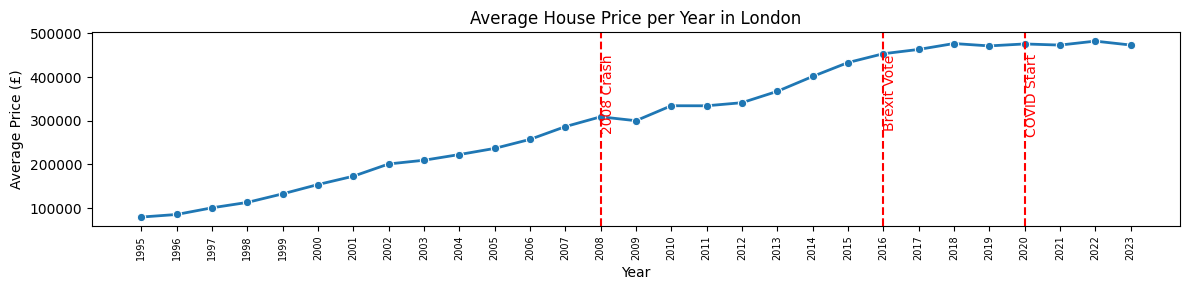

 
- The yearly trend reveals strong housing market recovery post-2008, a Brexit-induced plateau around 2016, 
  and a COVID dip in 2020 followed by a sharp rebound. 
- External economic and political events significantly influenced the London housing market.

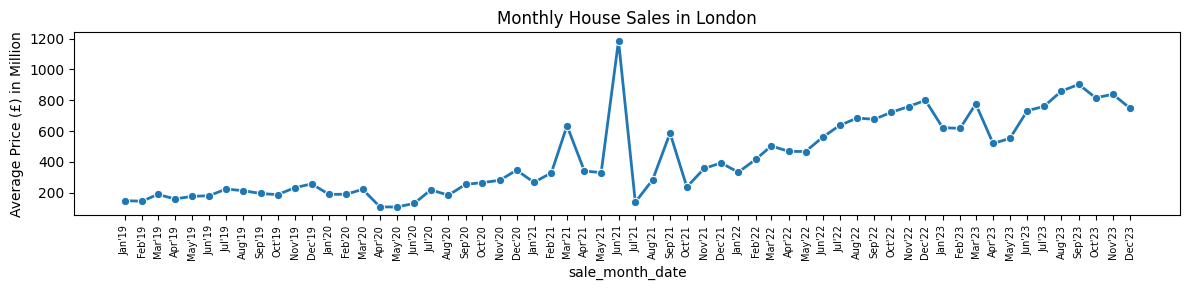

 
- Over the last 5 years, while seasonal peaks and troughs persist,
larger economic events—COVID, fiscal policy changes, and inflation—have caused significant year-over-year variations in price trends, especially around 2020–2022. 
- The market is showing signs of cooling or stabilizing in the most recent year.
- The spike in house sales in June 2021 and the subsequent drop in July 2021 were directly influenced by the timeline of the SDLT holiday. 
Buyers expedited transactions to benefit from the tax relief, leading to a temporary surge in the market, which then cooled as the incentive was withdrawn.

In [6]:
question = "How has the average price changed yearly/monthly? Are there cyclical patterns (e.g., post-2008 crash, Brexit, COVID)?"
display(Markdown(question))

# Yearly average price
yearly_avg = df.groupby('sale_year')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 3))
sns.lineplot(data=yearly_avg, x='sale_year', y='price', marker='o', linewidth=2)
plt.title('Average House Price per Year in London', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.xticks(yearly_avg["sale_year"], rotation=90, ha='center', fontsize=7)
plt.grid(False)

# Highlight major events
important_years = {
    '2008 Crash': 2008,
    'Brexit Vote': 2016,
    'COVID Start': 2020
}

for label, year in important_years.items():
    plt.axvline(x=year, color='red', linestyle='--')
    plt.text(year, plt.ylim()[1]*0.90, label, rotation=90, verticalalignment='top', color='red')

plt.tight_layout()
plt.show()

display(Markdown(""" 
- The yearly trend reveals strong housing market recovery post-2008, a Brexit-induced plateau around 2016, 
  and a COVID dip in 2020 followed by a sharp rebound. 
- External economic and political events significantly influenced the London housing market."""))


# Monthly average across all years
graph_data_01 = df[["sale_month", "sale_year", "price"]]
graph_data_01["sale_month_date"] = pd.to_datetime(df['sale_year'].astype(str) + '-' + df['sale_month'].astype(str) + '-01')
graph_data_01["price"] = graph_data_01["price"] * (10**-6)
graph_data_01.groupby(by="sale_month_date")["price"].sum().reset_index()

graph_data_02 = graph_data_01.groupby(by="sale_month_date")["price"].sum().reset_index() 
graph_data_02 = graph_data_02[graph_data_02["sale_month_date"] >= "2019-01-01"]

# Plot
plt.figure(figsize=(12, 3))
sns.lineplot(data=graph_data_02, x='sale_month_date', y='price', marker='o', linewidth=2)
plt.title(f'Monthly House Sales in London', fontsize=12)
plt.xlabel('sale_month_date')
plt.ylabel('Average Price (£) in Million')
plt.xticks(graph_data_02["sale_month_date"], [date.strftime('%b\'%y') for date in graph_data_02["sale_month_date"]], rotation=90, ha='center', fontsize=7)
plt.grid(False)
plt.tight_layout()
plt.show()


display(Markdown(""" 
- Over the last 5 years, while seasonal peaks and troughs persist,
larger economic events—COVID, fiscal policy changes, and inflation—have caused significant year-over-year variations in price trends, especially around 2020–2022. 
- The market is showing signs of cooling or stabilizing in the most recent year.
- The spike in house sales in June 2021 and the subsequent drop in July 2021 were directly influenced by the timeline of the SDLT holiday. 
Buyers expedited transactions to benefit from the tax relief, leading to a temporary surge in the market, which then cooled as the incentive was withdrawn."""))

Which years had the highest price variance (e.g., economic shocks)?

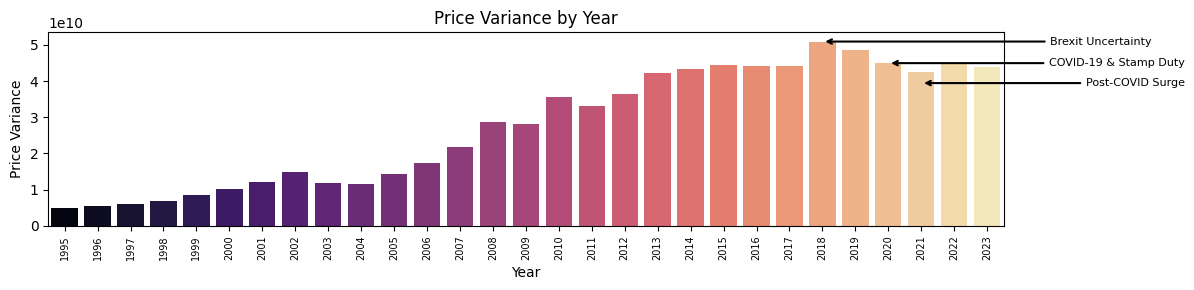

📌 Summary:
- 2018 to 2020 saw the highest house price variance in London.
- This period was marked by major economic and policy events:
    - Brexit uncertainty causing market hesitation.
    - COVID-19 pandemic leading to sudden demand and supply shifts.
    - Stamp Duty Holiday encouraging rapid buying in 2020.
- These external shocks caused sharp price swings, with 2018 being the most volatile year.
- Such high variance reflects strong economic influence on housing dynamics.

🔍 Modeling Implication:
- High variance makes house price prediction more complex and less stable.
- Use robust, non-linear models like:
    - XGBoost
    - Random Forest
- Add time-based features:
    - year, month
    - event/policy flags (e.g., "Stamp Duty Holiday")
- Apply log transformation on price to:
    - Reduce impact of outliers
    - Stabilize variance
    - Improve model performance and generalization

In [7]:
display(Markdown("Which years had the highest price variance (e.g., economic shocks)?"))

# Calculate variance or standard deviation per year
price_variance = df.groupby('sale_year')['price'].agg(['var', 'std']).reset_index()
price_variance = price_variance.sort_values(by='var', ascending=False)

# Plot
plt.figure(figsize=(12, 3))
sns.barplot(data=price_variance, x='sale_year', y='var', palette='magma')
plt.title("Price Variance by Year", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Price Variance")
plt.xticks(rotation=90, fontsize=7)

# Define special event years
event_years = {
    2018: "Brexit Uncertainty",
    2020: "COVID-19 & Stamp Duty",
    2021: "Post-COVID Surge"
}


plt.annotate(
    event_years[2018],                                   # Text (event label for that year)
    xy=(23, price_variance.loc[23, ["var"]][0]),         # Arrow points to the 'year' (x) and 'var' (y)
    xytext=(33, price_variance.loc[23, ["var"]][0]),     # Text placed slightly to the left of the point
    textcoords='data',                                   # Using data coordinates for placement
    ha='right', va='center',                             # Horizontal and vertical alignment
    fontsize=8, color='black',                           # Text style
    arrowprops=dict(arrowstyle="->", color='black', linewidth=1.5)  # Arrow properties
)

plt.annotate(
    event_years[2020],                                   # Text (event label for that year)
    xy=(25, price_variance.loc[25, ["var"]][0]),         # Arrow points to the 'year' (x) and 'var' (y)
    xytext=(34, price_variance.loc[25, ["var"]][0]),     # Text placed slightly to the left of the point
    textcoords='data',                                   # Using data coordinates for placement
    ha='right', va='center',                             # Horizontal and vertical alignment
    fontsize=8, color='black',                           # Text style
    arrowprops=dict(arrowstyle="->", color='black', linewidth=1.5)  # Arrow properties
)

plt.annotate(
    event_years[2021],                                   # Text (event label for that year)
    xy=(26, price_variance.loc[26, ["var"]][0]-3000000000),         # Arrow points to the 'year' (x) and 'var' (y)
    xytext=(34, price_variance.loc[26, ["var"]][0]-3000000000),     # Text placed slightly to the left of the point
    textcoords='data',                                   # Using data coordinates for placement
    ha='right', va='center',                             # Horizontal and vertical alignment
    fontsize=8, color='black',                           # Text style
    arrowprops=dict(arrowstyle="->", color='black', linewidth=1.5)  # Arrow properties
)
        


plt.tight_layout()
plt.show()


display(Markdown("""📌 Summary:
- 2018 to 2020 saw the highest house price variance in London.
- This period was marked by major economic and policy events:
    - Brexit uncertainty causing market hesitation.
    - COVID-19 pandemic leading to sudden demand and supply shifts.
    - Stamp Duty Holiday encouraging rapid buying in 2020.
- These external shocks caused sharp price swings, with 2018 being the most volatile year.
- Such high variance reflects strong economic influence on housing dynamics.

🔍 Modeling Implication:
- High variance makes house price prediction more complex and less stable.
- Use robust, non-linear models like:
    - XGBoost
    - Random Forest
- Add time-based features:
    - year, month
    - event/policy flags (e.g., "Stamp Duty Holiday")
- Apply log transformation on price to:
    - Reduce impact of outliers
    - Stabilize variance
    - Improve model performance and generalization"""))

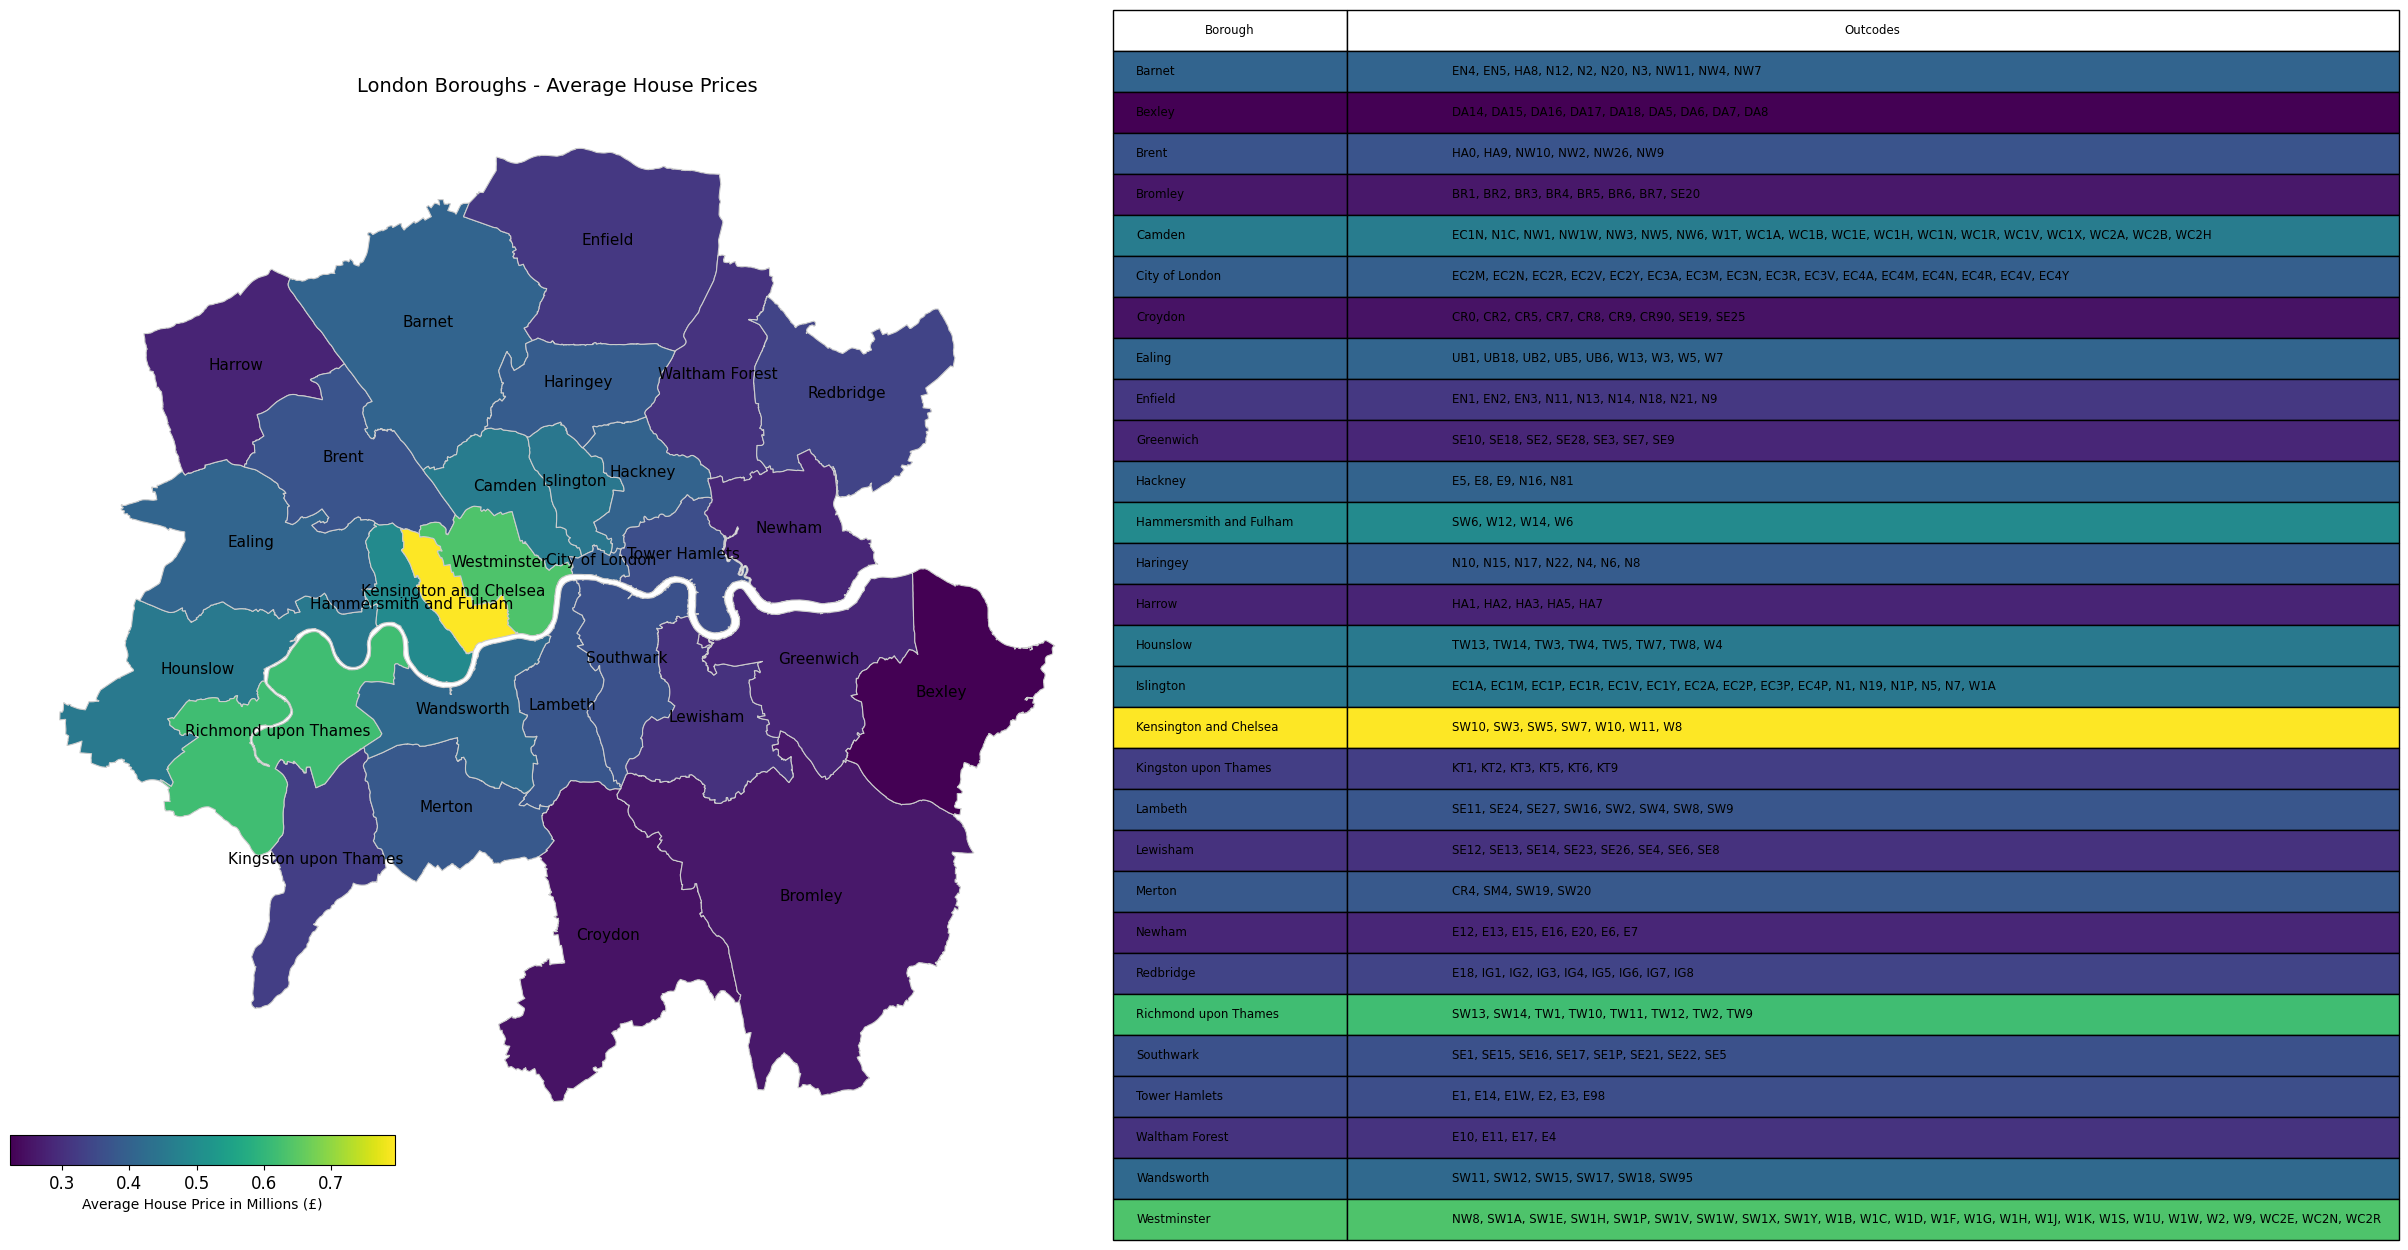

In [8]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from shapely.geometry import Point
import matplotlib

# Load data
london_boroughs_data = gpd.read_file(
    "/kaggle/input/londongeospatialdata/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
)

df = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
houses = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
houses['price'] = houses['price'] * (10**-6)

# Ensure both GeoDataFrames have the same CRS
houses = houses.to_crs(epsg=4326)
london_boroughs_data = london_boroughs_data.to_crs(epsg=4326)

# Spatial Join: Assign each house to a borough
houses_with_borough = gpd.sjoin(houses, london_boroughs_data, how="inner", predicate="within")

# Group by Borough and calculate Median Price
borough_price = houses_with_borough.groupby('NAME').agg(avg_price=('price', 'median')).reset_index()

# Merge back with borough shapes
london_boroughs_price = london_boroughs_data.merge(borough_price, on='NAME', how='left')

# Drop boroughs with no price data
london_boroughs_price = london_boroughs_price.dropna(subset=['avg_price'])

# Load postcode data
postcodes_df = pd.read_csv("/kaggle/input/london-postcode-outcode/london-postcode-outcodes.csv")
geometry = [Point(lon, lat) for lon, lat in zip(postcodes_df['longitude'], postcodes_df['latitude'])]
postcode_points = gpd.GeoDataFrame(postcodes_df, geometry=geometry, crs="EPSG:4326")

# Project to British National Grid
postcode_points_27700 = postcode_points.to_crs(epsg=27700)
buffer_distance = 500
postcode_buffers_27700 = postcode_points_27700.copy()
postcode_buffers_27700['geometry'] = postcode_points_27700.geometry.buffer(buffer_distance)

# Back to WGS84
postcode_buffers = postcode_buffers_27700.to_crs(epsg=4326)

# Ensure geometry and CRS are correct
postcode_buffers['geometry'] = [Point(xy) for xy in zip(postcode_buffers['longitude'], postcode_buffers['latitude'])]
postcode_buffers = gpd.GeoDataFrame(postcode_buffers, geometry='geometry', crs='EPSG:4326')

# Spatial Join with Boroughs
joined = gpd.sjoin(postcode_buffers, london_boroughs_price[['NAME', 'geometry']],
                   how='inner', predicate='within')

# Group by Borough
borough_outcodes_table = joined.groupby('NAME')['postcode'].apply(
    lambda x: ', '.join(sorted(set(x)))).reset_index()
borough_outcodes_table.columns = ['Borough', 'Outcodes']

# Create Figure and GridSpec
fig = plt.figure(figsize=(55, 15))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], figure=fig)

# --- Map Plot ---
ax0 = fig.add_subplot(gs[0, 0])
london_boroughs_price.plot(
    column='avg_price',
    cmap=matplotlib.colormaps.get_cmap('viridis'),
    linewidth=0.8,
    ax=ax0,
    edgecolor='0.8',
    legend=False,
)

# Annotate Borough Names
for idx, row in london_boroughs_price.iterrows():
    ax0.annotate(
        row['NAME'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=11,
        color='black'
    )

ax0.axis('off')
ax0.set_title("London Boroughs - Average House Prices", fontsize=14)

# --- Color Mapping ---
cmap = matplotlib.colormaps.get_cmap('viridis')
avg_prices = london_boroughs_price['avg_price']
vmin = np.nanmin(avg_prices)
vmax = np.nanmax(avg_prices)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

borough_color_mapping = {}
for idx, row in london_boroughs_price.iterrows():
    borough_color_mapping[row['NAME']] = cmap(norm(row['avg_price']))

# --- Table Plot ---
ax1 = fig.add_subplot(gs[0, 1:])
ax1.axis('off')

# Cell Colors
cell_colours = []
for borough in borough_outcodes_table['Borough']:
    color = borough_color_mapping.get(borough, (1, 1, 1, 1))
    cell_colours.append([color, color])

col_widths = [0.2, 0.9]

# Create Table
table = ax1.table(
    cellText=borough_outcodes_table.values,
    colLabels=borough_outcodes_table.columns,
    cellLoc='left',
    loc='left',
    cellColours=cell_colours,
    bbox=[0.0, 0.0, 2.35, 1],
    colWidths=col_widths
)

table.auto_set_font_size(False)
table.set_fontsize(8.5)
table.scale(1, 1.5)

# --- Colorbar ---
cax = fig.add_axes([0.10, 0.15, 0.07, 0.02])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Average House Price in Millions (£)', fontsize=10)
cbar.ax.tick_params(labelsize=12)

# --- Final Layout ---
# Add a border to the entire figure/container
# fig.patch.set_edgecolor('black')  # Set the color of the border
# fig.patch.set_linewidth(3)  # Set the width of the border
plt.subplots_adjust(left=0.10, right=0.40, top=0.92, bottom=0.1, wspace=0.01)
plt.show()

Do prices in certain areas (`outcode`) lag/lead others in trends?


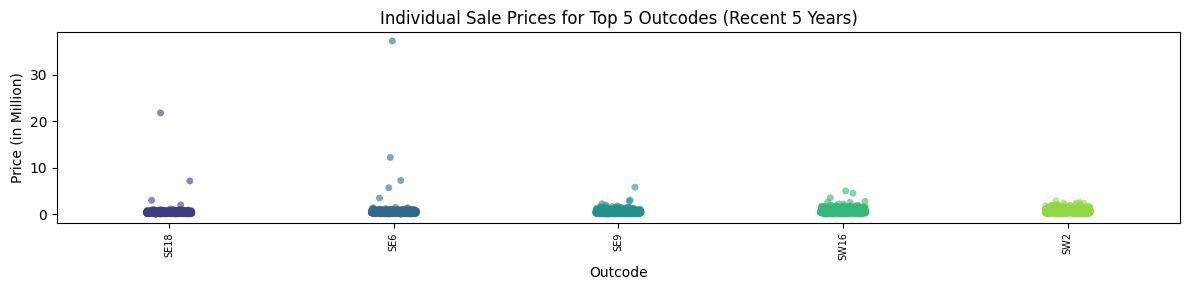


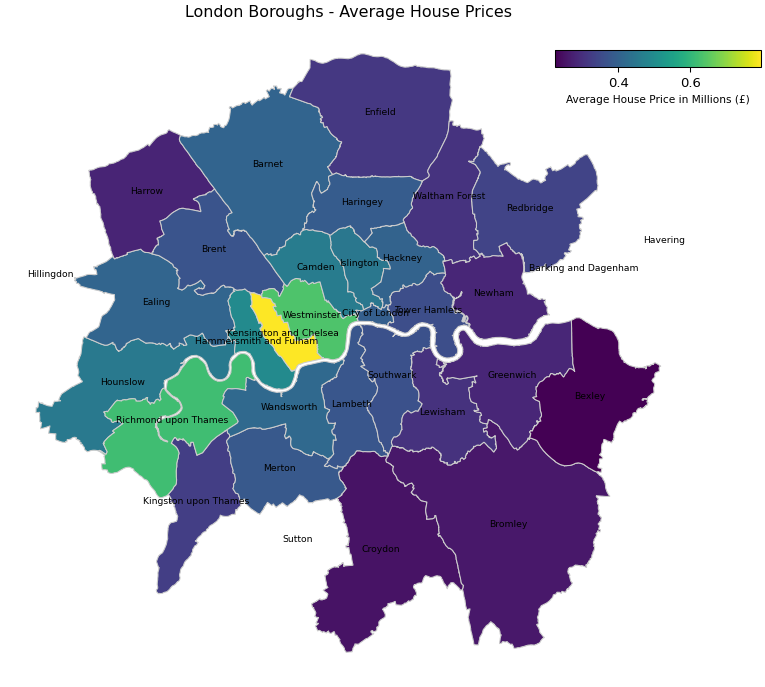

📌 Summary Insight: Price Trends Across Top Outcodes (Recent 5 Years)
- The scatter plot shows individual sale prices for the top 5 outcodes in London over the last 5 years.
- Areas like SW4 and SW2 exhibit higher price ranges, while SE9, SE6, and SE18 show relatively lower price clusters.
- The vertical spread (price variation) in each outcode is quite dense, but SW areas show higher ceilings, suggesting more high-end transactions.
- This pattern hints that some outcodes (like SW4/SW2) may lead price trends, being more sensitive to market movements, while SE areas may lag or remain more stable and affordable.

🔍 Modeling Implication:
- Price behavior varies significantly by outcode, suggesting geographic lag/lead effects.
- You should include outcode as a key categorical feature in modeling—possibly encoded using target encoding or embeddings (if using deep learning).
- Consider engineering trend features per outcode (e.g., year-wise average price growth) to model temporal shifts per location.
- Advanced models like Gradient Boosting (e.g., XGBoost) or LSTM + Tabular Hybrid models can help capture such area-based temporal dependencies.


In [9]:
display(Markdown("Do prices in certain areas (`outcode`) lag/lead others in trends?"))

# Individual Sale Prices for Top 5 Outcodes (Recent 5 Years)
# Step 1: Filter last 5 years
recent_5_years = df['sale_year'] >= (df['sale_year'].max() - 4)
df_recent = df[recent_5_years]
df_recent['price'] = df_recent['price']  * (10**-6)

# Step 2: Find top 5 outcodes by count
top_outcodes = df_recent['outcode'].value_counts().nlargest(5).index.tolist()

# Step 3: Filter to top 5 outcodes
df_top5 = df_recent[df_recent['outcode'].isin(top_outcodes)]

# Step 4: Plot scatter
plt.figure(figsize=(12,3))
sns.stripplot(data=df_top5, x='outcode', y='price', jitter=True, alpha=0.6, palette='viridis')
plt.title("Individual Sale Prices for Top 5 Outcodes (Recent 5 Years)")
plt.xlabel("Outcode")
plt.ylabel("Price (in Million)")
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
#plt.show()

# Convert to in-memory image
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', dpi=100)
plt.close()
buf.seek(0)

# 3. Display centered with HTML
display(HTML(f"""
<div style="
    display: flex;
    justify-content: center;
    position: relative;
    #left: -95px; 
    width: 100%;
">
    <img src='data:image/png;base64,{base64.b64encode(buf.read()).decode()}'>
</div>
"""))



# Map
#1
london_boroughs_data = gpd.read_file("/kaggle/input/londongeospatialdata/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
houses = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84 (lat/lon)
houses['price'] = houses['price']  * (10**-6)

# 2. Make sure both GeoDataFrames have the same CRS (Coordinate Reference System)
houses = houses.to_crs(epsg=4326)
london_boroughs_data = london_boroughs_data.to_crs(epsg=4326)

# 3. Spatial Join: Assign each house to a borough
houses_with_borough = gpd.sjoin(houses, london_boroughs_data, how="inner", predicate="within")

# 4. Group by Borough and calculate Average Price
borough_price = houses_with_borough.groupby('NAME').agg(avg_price=('price', 'median')).reset_index()

# 5. Merge Average Price back with Borough polygons
london_boroughs_price = london_boroughs_data.merge(borough_price, on='NAME', how='left')

# Plot Static Choropleth
fig, ax = plt.subplots(1, 1, figsize=(9.5, 9))

# Choropleth
london_boroughs_price.plot(
    column='avg_price',
    cmap='viridis',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=False,
)

# Add Borough Labels (NAME at centroid)
for idx, row in london_boroughs_price.iterrows():
    plt.annotate(
        row['NAME'],   # <-- Corrected here (remove s=)
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=7,
        color='black'
    )

# Create a ScalarMappable for the colorbar
norm = mpl.colors.Normalize(
    vmin=london_boroughs_price['avg_price'].min(),
    vmax=london_boroughs_price['avg_price'].max()
)
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  # Only needed for older versions of Matplotlib


# Add the colorbar above the map
cax = inset_axes(ax, width="10%", height="5%", loc='upper left',
                 bbox_to_anchor=(0.8, 0.46, 3, 0.5), bbox_transform=ax.transAxes, borderpad=0)

# Add the colorbar to the new axis
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal', 
                    fraction=0.04,   # Adjusts the size of the colorbar
                    pad=0.04,        # Adjusts the distance between the colorbar and the plot
                    aspect=50        # Adjusts the aspect ratio of the color
                   )

cbar.set_label('Average House Price in Millions (£)', fontsize=8)
ax.set_title("London Boroughs - Average House Prices", fontsize=12)
ax.axis('off')

# Convert to in-memory image
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', dpi=95, pad_inches=0.05)
plt.close()
buf.seek(0)

# 3. Display centered with HTML
display(HTML(f"""
<div style="
    display: flex;
    justify-content: center;
    position: relative;
    #left: -95px; 
    width: 100%;
">
    <img src='data:image/png;base64,{base64.b64encode(buf.read()).decode()}'>
</div>
"""))


display(Markdown("""📌 Summary Insight: Price Trends Across Top Outcodes (Recent 5 Years)
- The scatter plot shows individual sale prices for the top 5 outcodes in London over the last 5 years.
- Areas like SW4 and SW2 exhibit higher price ranges, while SE9, SE6, and SE18 show relatively lower price clusters.
- The vertical spread (price variation) in each outcode is quite dense, but SW areas show higher ceilings, suggesting more high-end transactions.
- This pattern hints that some outcodes (like SW4/SW2) may lead price trends, being more sensitive to market movements, while SE areas may lag or remain more stable and affordable.

🔍 Modeling Implication:
- Price behavior varies significantly by outcode, suggesting geographic lag/lead effects.
- You should include outcode as a key categorical feature in modeling—possibly encoded using target encoding or embeddings (if using deep learning).
- Consider engineering trend features per outcode (e.g., year-wise average price growth) to model temporal shifts per location.
- Advanced models like Gradient Boosting (e.g., XGBoost) or LSTM + Tabular Hybrid models can help capture such area-based temporal dependencies.
"""))

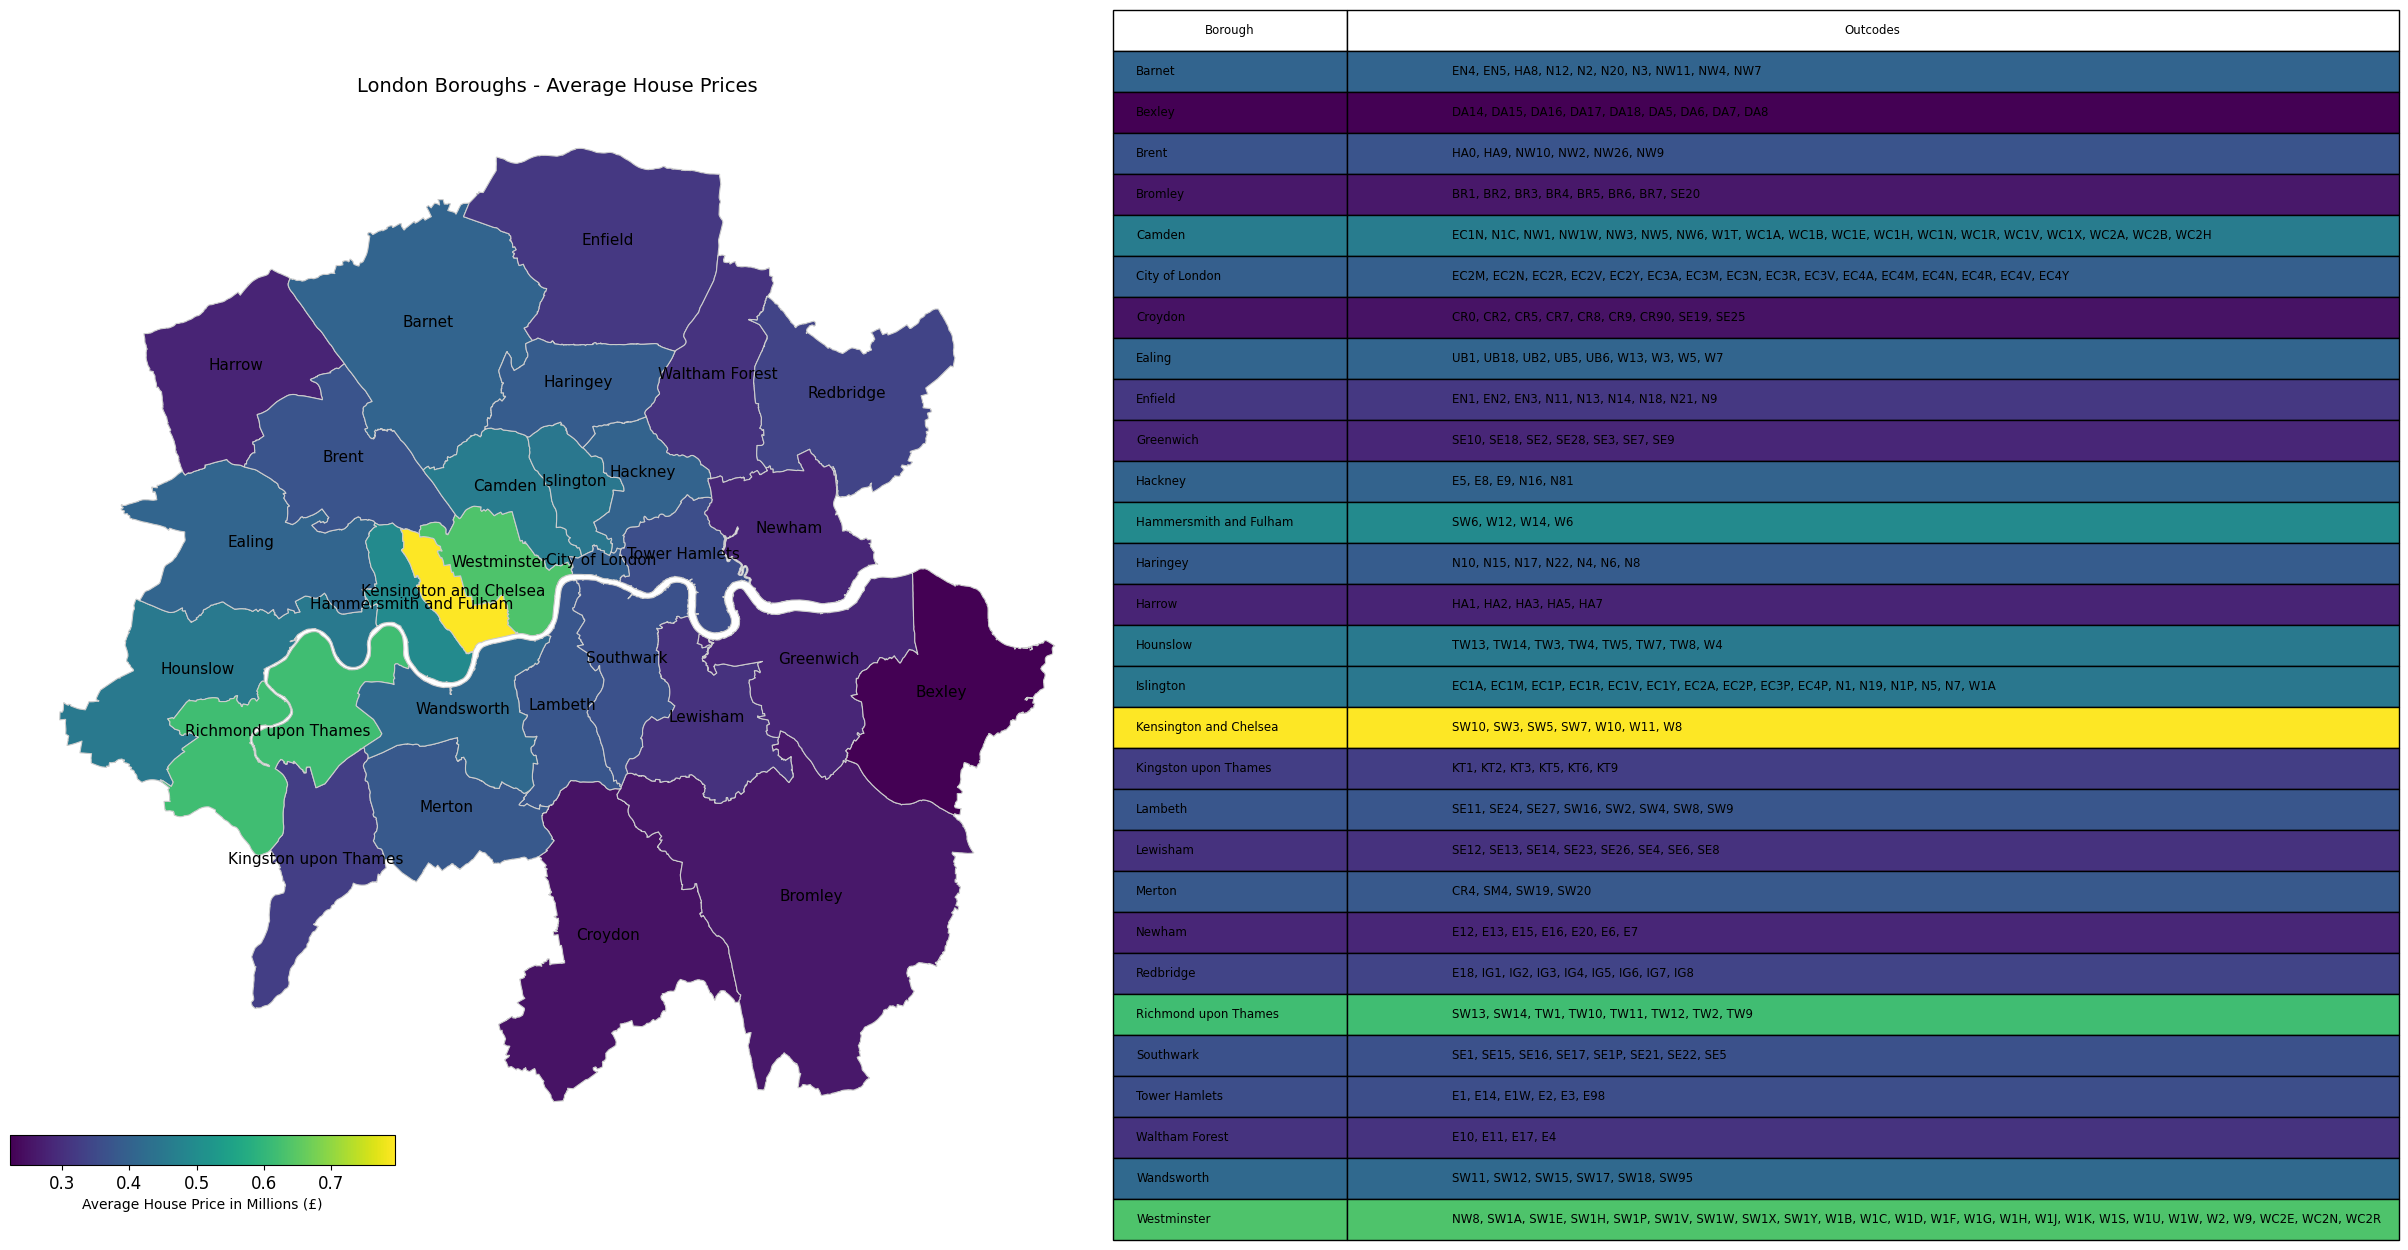

In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from shapely.geometry import Point
import matplotlib

# Load data
london_boroughs_data = gpd.read_file(
    "/kaggle/input/londongeospatialdata/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
)

df = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")
geometry = [Point(lon, lat) for lon, lat in zip(df['longitude'], df['latitude'])]
houses = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
houses['price'] = houses['price'] * (10**-6)

# Ensure both GeoDataFrames have the same CRS
houses = houses.to_crs(epsg=4326)
london_boroughs_data = london_boroughs_data.to_crs(epsg=4326)

# Spatial Join: Assign each house to a borough
houses_with_borough = gpd.sjoin(houses, london_boroughs_data, how="inner", predicate="within")

# Group by Borough and calculate Median Price
borough_price = houses_with_borough.groupby('NAME').agg(avg_price=('price', 'median')).reset_index()

# Merge back with borough shapes
london_boroughs_price = london_boroughs_data.merge(borough_price, on='NAME', how='left')

# Drop boroughs with no price data
london_boroughs_price = london_boroughs_price.dropna(subset=['avg_price'])

# Load postcode data
postcodes_df = pd.read_csv("/kaggle/input/london-postcode-outcode/london-postcode-outcodes.csv")
geometry = [Point(lon, lat) for lon, lat in zip(postcodes_df['longitude'], postcodes_df['latitude'])]
postcode_points = gpd.GeoDataFrame(postcodes_df, geometry=geometry, crs="EPSG:4326")

# Project to British National Grid
postcode_points_27700 = postcode_points.to_crs(epsg=27700)
buffer_distance = 500
postcode_buffers_27700 = postcode_points_27700.copy()
postcode_buffers_27700['geometry'] = postcode_points_27700.geometry.buffer(buffer_distance)

# Back to WGS84
postcode_buffers = postcode_buffers_27700.to_crs(epsg=4326)

# Ensure geometry and CRS are correct
postcode_buffers['geometry'] = [Point(xy) for xy in zip(postcode_buffers['longitude'], postcode_buffers['latitude'])]
postcode_buffers = gpd.GeoDataFrame(postcode_buffers, geometry='geometry', crs='EPSG:4326')

# Spatial Join with Boroughs
joined = gpd.sjoin(postcode_buffers, london_boroughs_price[['NAME', 'geometry']],
                   how='inner', predicate='within')

# Group by Borough
borough_outcodes_table = joined.groupby('NAME')['postcode'].apply(
    lambda x: ', '.join(sorted(set(x)))).reset_index()
borough_outcodes_table.columns = ['Borough', 'Outcodes']

# Create Figure and GridSpec
fig = plt.figure(figsize=(55, 15))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], figure=fig)

# --- Map Plot ---
ax0 = fig.add_subplot(gs[0, 0])
london_boroughs_price.plot(
    column='avg_price',
    cmap=matplotlib.colormaps.get_cmap('viridis'),
    linewidth=0.8,
    ax=ax0,
    edgecolor='0.8',
    legend=False,
)

# Annotate Borough Names
for idx, row in london_boroughs_price.iterrows():
    ax0.annotate(
        row['NAME'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=11,
        color='black'
    )

ax0.axis('off')
ax0.set_title("London Boroughs - Average House Prices", fontsize=14)

# --- Color Mapping ---
cmap = matplotlib.colormaps.get_cmap('viridis')
avg_prices = london_boroughs_price['avg_price']
vmin = np.nanmin(avg_prices)
vmax = np.nanmax(avg_prices)
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

borough_color_mapping = {}
for idx, row in london_boroughs_price.iterrows():
    borough_color_mapping[row['NAME']] = cmap(norm(row['avg_price']))

# --- Table Plot ---
ax1 = fig.add_subplot(gs[0, 1:])
ax1.axis('off')

# Cell Colors
cell_colours = []
for borough in borough_outcodes_table['Borough']:
    color = borough_color_mapping.get(borough, (1, 1, 1, 1))
    cell_colours.append([color, color])

col_widths = [0.2, 0.9]

# Create Table
table = ax1.table(
    cellText=borough_outcodes_table.values,
    colLabels=borough_outcodes_table.columns,
    cellLoc='left',
    loc='left',
    cellColours=cell_colours,
    bbox=[0.0, 0.0, 2.35, 1],
    colWidths=col_widths
)

table.auto_set_font_size(False)
table.set_fontsize(8.5)
table.scale(1, 1.5)

# --- Colorbar ---
cax = fig.add_axes([0.10, 0.15, 0.07, 0.02])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
cbar.set_label('Average House Price in Millions (£)', fontsize=10)
cbar.ax.tick_params(labelsize=12)

# --- Final Layout ---
# Add a border to the entire figure/container
# fig.patch.set_edgecolor('black')  # Set the color of the border
# fig.patch.set_linewidth(3)  # Set the width of the border
plt.subplots_adjust(left=0.10, right=0.40, top=0.92, bottom=0.1, wspace=0.01)
plt.show()
